In [74]:
from obspy import read
import obspy.signal as signal
import obspy.signal.konnoohmachismoothing as kmsmooth
from obspy.signal.invsim import paz_to_freq_resp
from obspy.signal.invsim import cosine_taper
from obspy.core import Trace
from obspy.core import Stream
from obspy.core import UTCDateTime
from obspy.signal.invsim import corn_freq_2_paz

import numpy as np
from numpy import float64
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import os
import math
from cmath import exp

3 Trace(s) in Stream:
CQ.ROC.00.BHE | 2016-06-27T10:12:06.000000Z - 2016-06-27T10:18:05.990000Z | 100.0 Hz, 36000 samples
CQ.ROC.00.BHN | 2016-06-27T10:12:06.000000Z - 2016-06-27T10:18:05.990000Z | 100.0 Hz, 36000 samples
CQ.ROC.00.BHZ | 2016-06-27T10:12:06.000000Z - 2016-06-27T10:18:05.990000Z | 100.0 Hz, 36000 samples
         network: CQ
         station: ROC
        location: 00
         channel: BHE
       starttime: 2016-06-27T10:12:06.000000Z
         endtime: 2016-06-27T10:18:05.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'b': 0.0, 'e': 359.99, 'o': 60.0, 'internal0': 2.0, 'stla': 29.3793, 'stlo': 105.4431, 'stel': 430.0, 'stdp': 0.0, 'evla': 31.89, 'evlo': 104.41, 'evdp': 10.0, 'mag': 4.5, 'dist': 295.1056, 'az': 160.14972, 'baz': 340.67365, 'gcarc': 2.656216, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2016, 'nzjday': 179, 'nzhour': 10, 'nzmin': 12, 'nzsec'

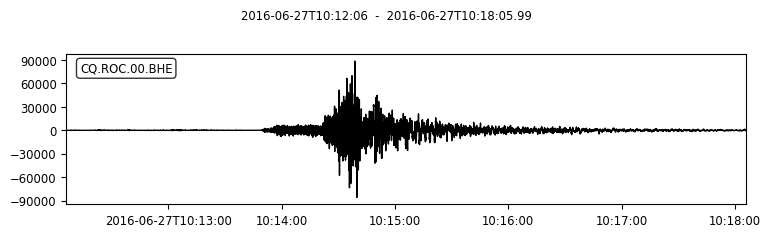

In [8]:
threechannels = read('F:\\eq_data\\testFFT\\20160627\\2016.179.10.12.06.0000.CQ.ROC.00.BHE.D.SAC')
threechannels += read('F:\\eq_data\\testFFT\\20160627\\2016.179.10.12.06.0000.CQ.ROC.00.BHN.D.SAC')
threechannels += read('F:\\eq_data\\testFFT\\20160627\\2016.179.10.12.06.0000.CQ.ROC.00.BHZ.D.SAC')
print(threechannels)
data = threechannels[0]
print(data.stats)                      
data.plot() 

In [9]:
st = data.stats
st

         network: CQ
         station: ROC
        location: 00
         channel: BHE
       starttime: 2016-06-27T10:12:06.000000Z
         endtime: 2016-06-27T10:18:05.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'b': 0.0, 'e': 359.99, 'o': 60.0, 'internal0': 2.0, 'stla': 29.3793, 'stlo': 105.4431, 'stel': 430.0, 'stdp': 0.0, 'evla': 31.89, 'evlo': 104.41, 'evdp': 10.0, 'mag': 4.5, 'dist': 295.1056, 'az': 160.14972, 'baz': 340.67365, 'gcarc': 2.656216, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2016, 'nzjday': 179, 'nzhour': 10, 'nzmin': 12, 'nzsec': 6, 'nzmsec': 0, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 36000, 'iftype': 1, 'idep': 5, 'leven': 1, 'lpspol': 0, 'lcalda': 1, 'unused23': 0, 'kstnm': 'ROC     ', 'khole': '00      ', 'kcmpnm': 'BHE     ', 'knetwk': 'CQ      ', 'kevnm': '        '})

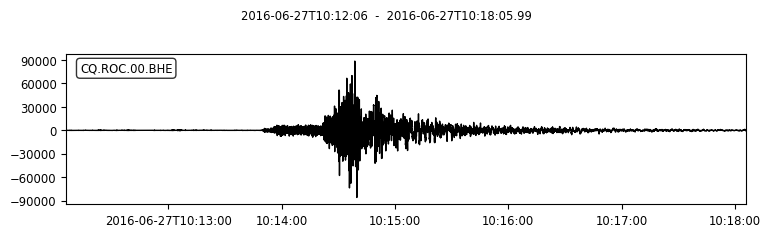

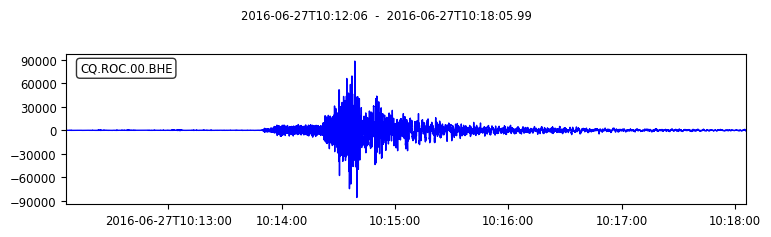

In [22]:
tr0 = data.copy()
tr0=tr0.filter('lowpass', freq=20, corners=4, zerophase=True)
tr0.plot(color='k')
tr1 = tr0.filter('highpass', freq=0.1, corners=4, zerophase=True)
tr1.plot(color='b')

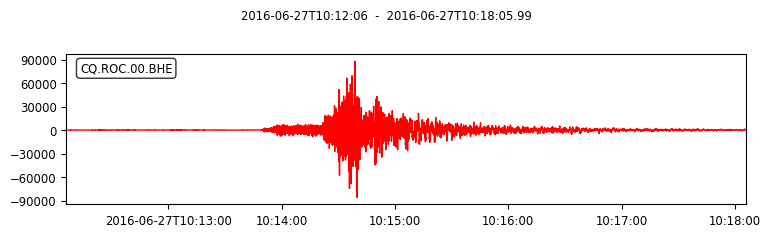

In [39]:
tr2 = data.copy()
tr2 = tr1.filter('bandpass', freqmin=0.1, freqmax=25, corners=4, zerophase=True)
tr2.plot(color='r')

In [24]:
from scipy.signal import butter, lfilter,detrend
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = lfilter(b, a, data)
    return y

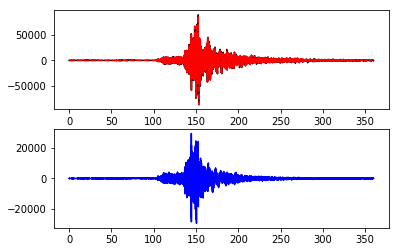

In [33]:
tr3 = data.copy()
fs = 1. / st.delta
result = butter_bandpass_filter(tr3.data,0.02, 25, fs)
res = tr3.data - result
time = np.cumsum(st.delta * np.ones(len(tr3), dtype=float))

plt.subplot(211)
plt.plot(time,tr3.data, "k-",time,result, "r--")
plt.subplot(212)
plt.plot(time,res, 'b-')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


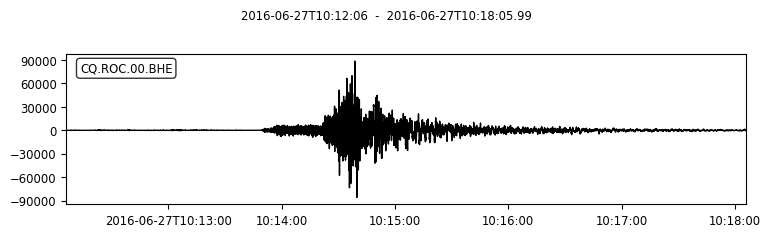

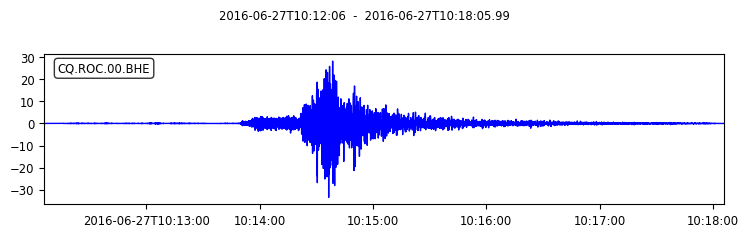

In [37]:
paz_sts2 = { 'poles': [-7.397840e-02 + 7.397840e-02j, -7.397840e-02 - 7.397840e-02j,-1.004800e+03 + 0.0j,
                       -5.024000e+02 + 0.0j,-1.130400e+03 + 0.0j],
            'zeros': [0j, 0j],
            'gain': 1.998960e+03,
            'sensitivity': 6.290000e+08}

paz_1hz = corn_freq_2_paz(1.0, damp=0.707)  # 1Hz instrument

paz_1hz['sensitivity'] = 1.0

st = obspy.read('F:\\eq_data\\testFFT\\20160627\\2016.179.10.12.06.0000.CQ.ROC.00.BHE.D.SAC')

st_orig = st.copy()

st.simulate(paz_remove=paz_sts2, paz_simulate=paz_1hz)

st_orig.plot(color='k')
st.plot(color='b')

### H/V function (This is called later in the script)

In [78]:
def hvfunc(statname,eq_delay,winlen):
        filepathN=os.path.join(statname + '.BHN.D.SAC') #define the filepaths of the time series (north east and vertical)
        filepathE=os.path.join(statname + '.BHE.D.SAC')
        filepathZ=os.path.join(statname + '.BHZ.D.SAC')

        st=read(filepathN)   #read input files and saves them as stream files
        N=st[0]              #extracts and saves the first trace from the stream
        st=read(filepathE)
        E=st[0]
        st=read(filepathZ)
        Z=st[0]


        #======Processing==========
        N.detrend('simple') #removes simple linear trend
        E.detrend('simple')
        Z.detrend('simple')
        N.detrend('demean') #removes mean
        E.detrend('demean')
        Z.detrend('demean')
        N.filter('bandpass', freqmin=0.1, freqmax=20, corners=2, zerophase=True) #bandpass filter
        E.filter('bandpass', freqmin=0.1, freqmax=20, corners=2, zerophase=True)
        Z.filter('bandpass', freqmin=0.1, freqmax=20, corners=2, zerophase=True)

        #=======Window parameters==========
        t_start=N.stats.starttime       #extract start time of the trace
        t_end=N.stats.endtime           #extract end time
        trlen=t_end-t_start             #calculates length
        time=np.arange(0,N.stats.npts*N.stats.delta,N.stats.delta)  #creates an array for the time axis of the trace

        eq_t=t_start+eq_delay                                      #variable for when the S-wave energy arrives

        N_tw1 = N.slice(eq_t, eq_t+winlen)                        #slice the traces into a short time window
        E_tw1 = E.slice(eq_t, eq_t+winlen)
        Z_tw1 = Z.slice(eq_t, eq_t+winlen)
        N_tw1.taper(type='cosine',max_percentage=0.1,side='both')   #taper the edges of the time window
        E_tw1.taper(type='cosine',max_percentage=0.1,side='both')
        Z_tw1.taper(type='cosine',max_percentage=0.1,side='both')

        #======Spectral analysis=========
        N_fft=np.fft.fft(N_tw1.data)     #Fast fourier transform of each trace
        E_fft=np.fft.fft(E_tw1.data)
        Z_fft=np.fft.fft(Z_tw1.data)
        fftn=int(len(Z_fft)/2)                #extract no of samples
        df=N.stats.sampling_rate
        print('samp rate is',df)
        
        #reads the sampling rate from the header info
        N_fft=N_fft[0:fftn]      #remove freqyency content above the nyquist and negative freqs
        E_fft=E_fft[0:fftn]
        Z_fft=Z_fft[0:fftn]
        freq_axis=np.linspace(0,df/2,fftn)   #defines a frequency axis
        N_freq=abs(N_fft)                      #take amplitude of spectra
        E_freq=abs(E_fft)
        Z_freq=abs(Z_fft)
        freq_axis = float64(freq_axis)      #change precision
        N_freq = float64(N_freq)
        E_freq = float64(E_freq)
        Z_freq = float64(Z_freq)
        
        #smooths the spectra
        smoothing_cons=40
        N_freq_smooth = kmsmooth.konno_ohmachi_smoothing(N_freq, freq_axis, bandwidth=smoothing_cons, max_memory_usage=1024, normalize=False)
        E_freq_smooth = kmsmooth.konno_ohmachi_smoothing(E_freq, freq_axis, bandwidth=smoothing_cons, max_memory_usage=1024, normalize=False)
        Z_freq_smooth = kmsmooth.konno_ohmachi_smoothing(Z_freq, freq_axis, bandwidth=smoothing_cons, max_memory_usage=1024, normalize=False)
        
        N_double=abs(np.power(N_freq_smooth,2))    #square components
        E_double=abs(np.power(E_freq_smooth,2))
        H=np.sqrt(np.add(E_double,N_double)/2)    #take quadratic mean
        
        HV=np.divide(H,Z_freq_smooth)   #Calculate H/V

        """plt.figure(figsize=(10,7))
        plt.subplot(211)
        plt.semilogx(freq_axis,H,'r-',linewidth=4.0)
        plt.semilogx(freq_axis,Z_freq_smooth,'b-',linewidth=4.0)
        plt.legend(('H','V'))
        plt.subplot(212)
        plt.semilogx(freq_axis,HV,'k-',linewidth=4.0)
        plt.legend(('H/V'))"""
        
        return time,Z,freq_axis,H,HV;      #return the function outputs

C:\ProgramData\Anaconda3\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\obspy\core\trace.py:2111: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(self.data.dtype, float):


samp rate is 100.0


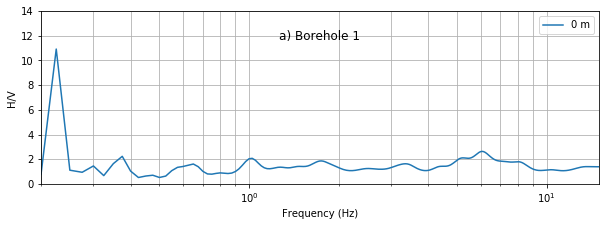

In [80]:
#Original HV

statname = 'F:\\eq_data\\testFFT\\20160627\\2016.179.10.12.06.0000.CQ.ROC.00'

tw_len=40        #length of the time window		
eq_delay=291     #delay of S-wave energy

time1,Z1,freq_axis1,H1,HVcurve1 = hvfunc(statname,eq_delay,tw_len)


#plot results
xmin=0.2
xmax=15
ymin=0
ymax=14

plt.figure(figsize=(10,7))
ax=plt.subplot(212)
plt.semilogx(freq_axis1,HVcurve1)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('Frequency (Hz)')
plt.ylabel('H/V')
plt.grid(which='both')

ax.set_title('a) Borehole 1',x=0.5,y=0.8)
plt.legend(('0 m','9 m','41 m'))

plt.show()